# 6.6 Sourcing & Analyzing Time

This script contains the following:
1. Importing libraries and data
2. Wrangling and cleaning time series data
3. Time Series Analysis:  Decomposition
4. Testing for Stationarity
5. Stationarizing the Federal Reserve Economic Data

## Importing libraries and data

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [7]:
path = r'C:\Users\Barb\19-09-2024 Gun Violence Data'

In [8]:
#Import the gun violence data from 6-3

df_gun = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-3.csv'), index_col = 0)

In [9]:
df_gun.head()

,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_gender
0,2013-01-01,Pennsylvania,0,4,NaN,NaN,1.0,0::20,0::Male||1::Male||3::Male||4::Female
1,2013-01-01,California,1,3,NaN,NaN,1.0,0::20,0::Male
2,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
3,2013-01-05,Colorado,4,0,NaN,NaN,1.0,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male
4,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female


In [10]:
df_gun.shape

(239677, 9)

In [11]:
df_gun.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'gun_stolen', 'gun_type',
       'n_guns_involved', 'participant_age', 'participant_gender'],
      dtype='object')

In [12]:
# Select only the necessary columns and put them in a list called columns

In [13]:
columns =['date', 'n_killed']

In [14]:
# Create a subset

killed_gun = df_gun[columns]

In [15]:
killed_gun.columns

Index(['date', 'n_killed'], dtype='object')

In [16]:
killed_gun.head(5)

,date,n_killed
0,2013-01-01,0
1,2013-01-01,1
2,2013-01-01,1
3,2013-01-05,4
4,2013-01-07,2


In [17]:
killed_gun.tail(5)

,date,n_killed
239672,2018-03-31,0
239673,2018-03-31,1
239674,2018-03-31,0
239675,2018-03-31,1
239676,2018-03-31,2


In [18]:
# Set the "Date" column as the index

from datetime import datetime

killed_gun['datetime'] = pd.to_datetime(killed_gun['date']) # Create a datetime column from "Date.""
killed_gun = killed_gun.set_index('datetime') # Set the datetime as the index of the dataframe.
killed_gun.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
killed_gun.head()

,n_killed
datetime,
2013-01-01,0
2013-01-01,1
2013-01-01,1
2013-01-05,4
2013-01-07,2


In [19]:
type(killed_gun)

pandas.core.frame.DataFrame

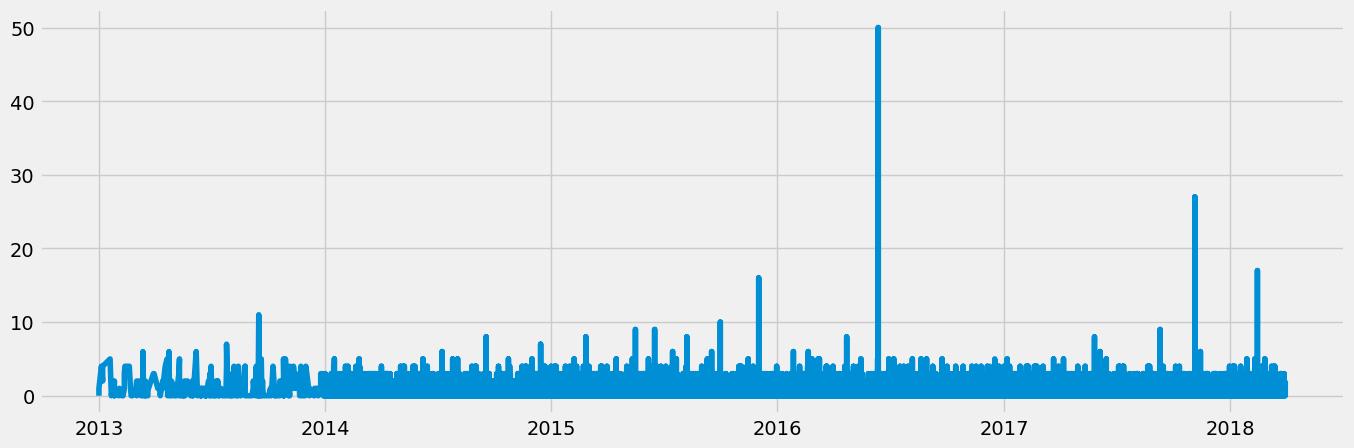

In [20]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(killed_gun)

#####
##### This data includes the number of killings from guns from the years 2013 - 2018 in the US.
#####

## 2. Wrangling and cleaning time-series data

In [22]:
# Check for missing values
killed_gun.isnull().sum()

n_killed    0
dtype: int64

In [23]:
# Check for duplicates

dups = killed_gun.duplicated()
dups.shape



(239677,)

In [24]:
killed_gun.shape   # number of rows before deleting duplicates

(239677, 1)

In [25]:
killed_gun_no_dups = killed_gun.drop_duplicates()

In [26]:
killed_gun_no_dups.shape

(16, 1)

In [27]:
killed_gun_no_dups.head(16)

,n_killed
datetime,
2013-01-01,0
2013-01-01,1
2013-01-05,4
2013-01-07,2
2013-01-19,5
2013-02-11,3
2013-03-13,6
2013-07-26,7
2013-09-16,11


## 3. Time-series analysis: decomposition

In [32]:
killed_gun_no_dups

,n_killed
datetime,
2013-01-01,0
2013-01-01,1
2013-01-05,4
2013-01-07,2
2013-01-19,5
2013-02-11,3
2013-03-13,6
2013-07-26,7
2013-09-16,11


In [33]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(killed_gun['n_killed'], model='additive',period = 7)

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

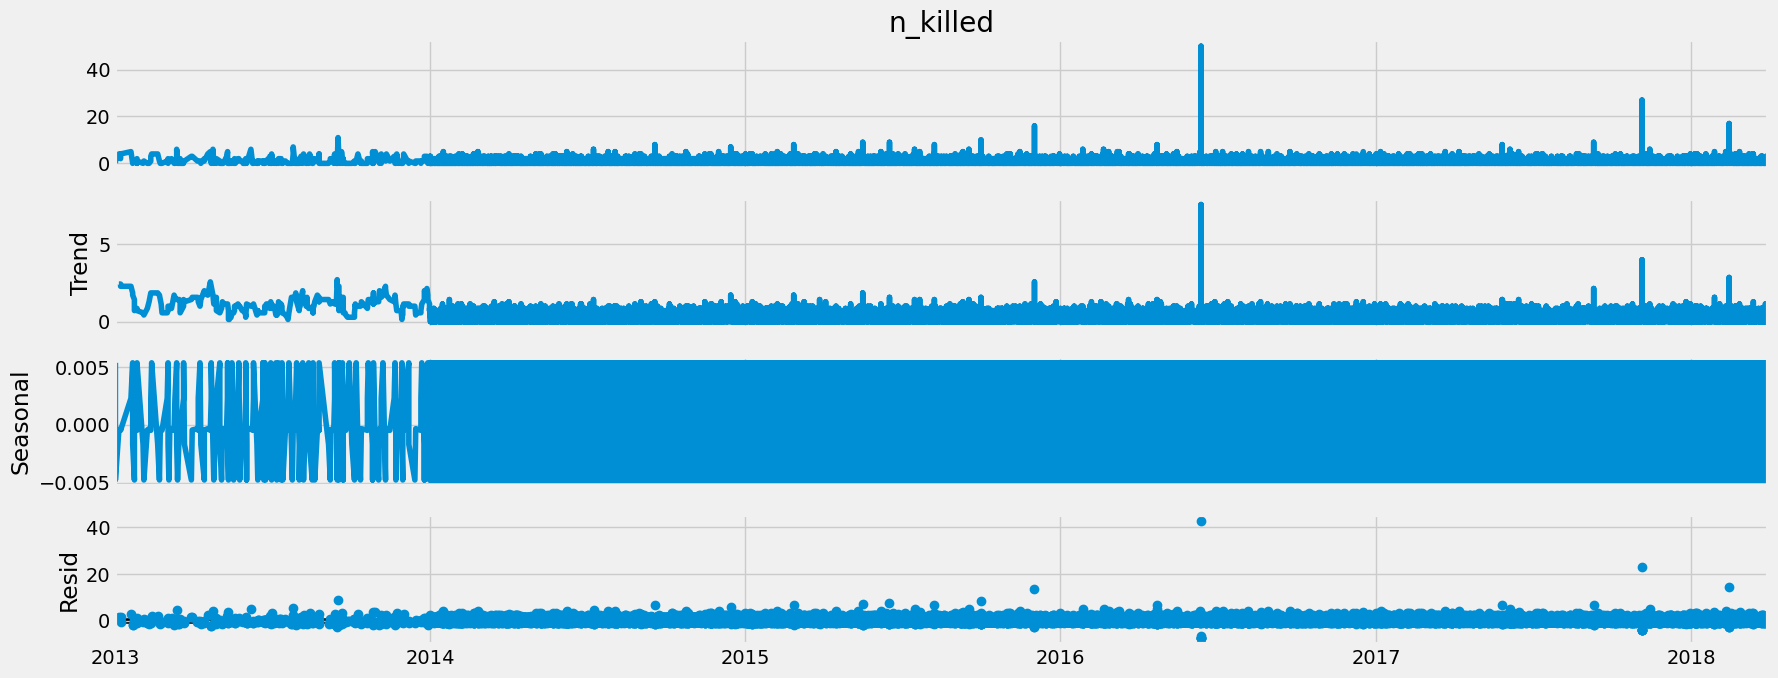

In [35]:
# Plot the separate components

decomposition.plot()
plt.show()

#####
##### The 1st chart in the figure above is the data itself (including all of its components.). This is called the level. 
#####     Most of the data points are less than 5. However, we do see spikes throughout the time range.
##### The 2nd chart is the underlying trend. It looks a lot like the first chart except the 1st year 2013-2014, which shows the most variation in data.
##### The 3rd chart is seasonality. The seasonal fluctuations are represented by a spikey sinusoidal curve that changes at a regular interval during #####     the 1st year (2013-2014). If you didn't have any seasonality (which is rarely the case), the curve would be flat.
##### The 4th chart is the noise (residual). The noise is what is left of the data after the trend and seasonality has been extracted. There is not #####     much unexplained noise. The singular data points that stand out are the top part of the spikes in the 1st chart (the data).
#####

In [69]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(killed_gun_no_dups['n_killed'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.307481
p-value                         0.998960
Number of Lags Used             5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


#####
##### The test statistic is the direct result of the statistical test. Considering this is a left-tailed test (or even a 2-tailed test), 
#####     the test statistic is within the region where you cannot reject the null hypothesis.
#####     This means that there is a unit root in the data, and my data is non-stationary.
#####

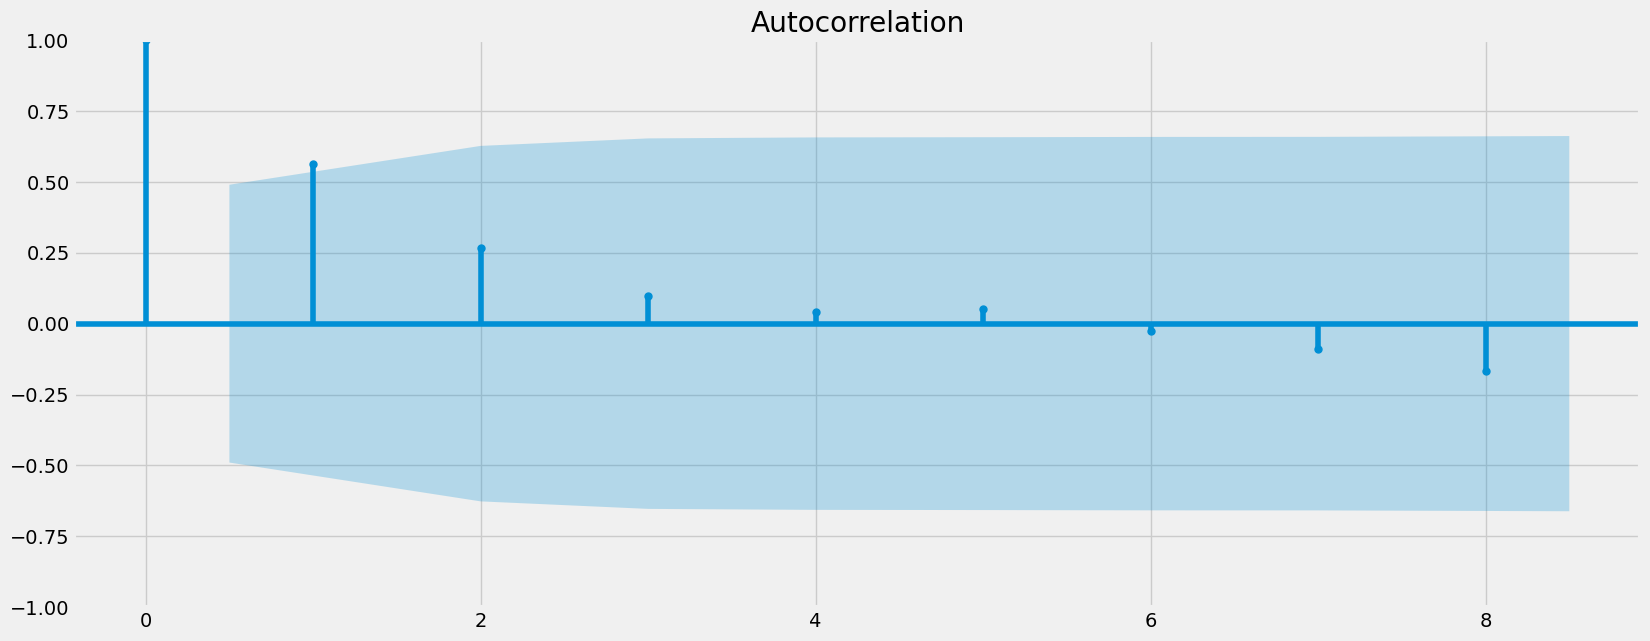

In [73]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(killed_gun_no_dups)
plt.show()

## 5. Stationarizing the Gun Violence Data

In [76]:
data_diff = killed_gun_no_dups - killed_gun_no_dups.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [78]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [80]:
data_diff.head()

,n_killed
datetime,
2013-01-01,1.0
2013-01-05,3.0
2013-01-07,-2.0
2013-01-19,3.0
2013-02-11,-2.0


In [82]:
data_diff.columns

Index(['n_killed'], dtype='object')

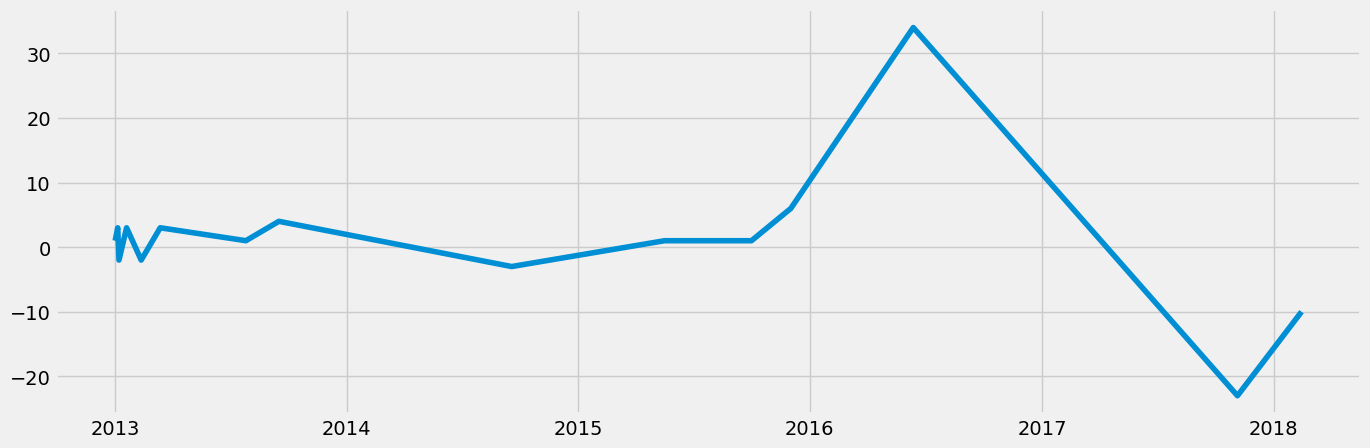

In [84]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [86]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.625534
p-value                         0.005291
Number of Lags Used             3.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


#####
##### The test statistic is the direct result of the statistical test. Considering this is a left-tailed test (or even a 2-tailed test),
#####     the test statistic is within the region where you can reject the null hypothesis at the 5% and 10% significance levels.
#####     The p-value is < .05, too. This means that I can reject the null hypothesis and consider my data series non-stationary.
#####

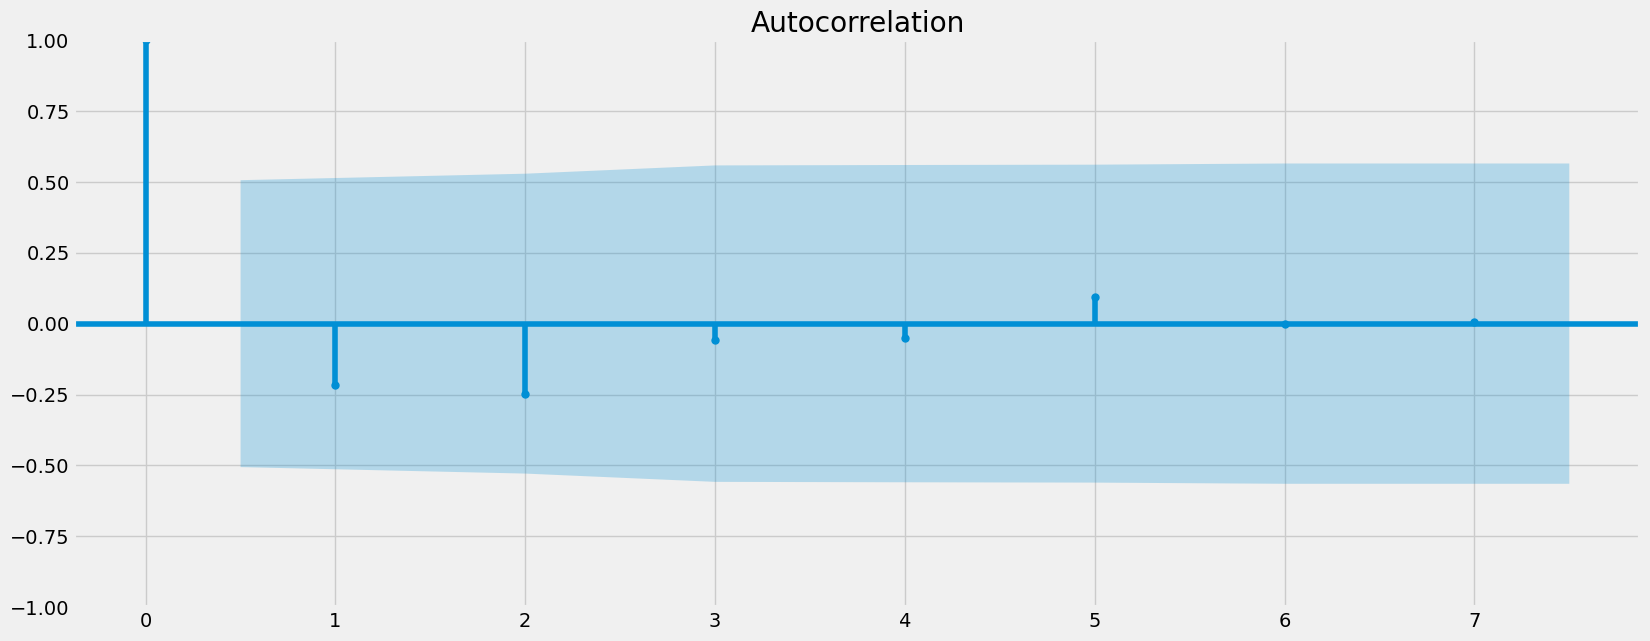

In [88]:
plot_acf(data_diff)
plt.show()